**Learn note for `GALFIT`**  

复制`galfit-example`里的`EXAMPLE`文件到此程序所在目录，重命名为`test`  
在test里面做练习，此程序辅助分析  
@time: 2022.07.07  
@[GALFIT web](https://users.obs.carnegiescience.edu/peng/work/galfit/galfit.html)


In [30]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt

# ^ 禁用同一单元格内的输出覆盖
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

PATH_test = "/Users/rui/Code/1_Learn/11_Learn GALFIT/test"

# Input files  
1. gal.fits
2. galfit.feedme
3. psf.fits

输入图像的性质

In [24]:
# 输入图像
PATH = os.path.join(PATH_test, 'gal.fits')

hdul = fits.open(PATH)
hdul.info()

image = fits.getdata(PATH)
print(type(image))
print(image.shape)

Filename: /Users/rui/Code/1_Learn/11_Learn GALFIT/test/gal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     395   (93, 93)   float32   
<class 'numpy.ndarray'>
(93, 93)


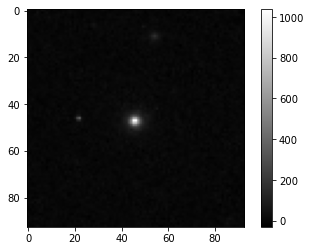

In [23]:
plt.imshow(image, cmap='gray')
plt.colorbar()

psf性质

In [45]:
PATH = os.path.join(PATH_test, 'psf.fits')

hdul = fits.open(PATH)
hdul.info()

image = fits.getdata(PATH)
print(type(image))
print(image.shape)
hdul[0].header

Filename: /Users/rui/Code/1_Learn/11_Learn GALFIT/test/psf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (51, 51)   float32   
<class 'numpy.ndarray'>
(51, 51)


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                   51 / Axis length                                    
NAXIS2  =                   51 / Axis length                                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '13:40:45 (10/09/2002)' / Time of last modification                   
OBJECT  = 'PSF evaluated at X: 255.50 Y: 255.50 Mag: 19.140'                    
IRAF    = 'NOAO/IRAFV2.11EXPORT'                                                
HOST    = 'spiff.as.arizona.edu'                                                
USER    = 'cyp     '                                                            
DATE    = '2002-09-10T20:40:

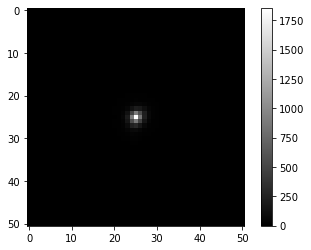

In [26]:
plt.imshow(image, cmap='gray')
plt.colorbar()

# Output files

`imgblock.fits`: 输出图像的FITS cube

In [32]:
PATH = os.path.join(PATH_test, 'imgblock.fits')

hdul = fits.open(PATH)
hdul.info()

Filename: /Users/rui/Code/1_Learn/11_Learn GALFIT/test/imgblock.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (93, 93)   float32   
  1                1 ImageHDU       391   (93, 93)   float32   
  2                1 ImageHDU        43   (93, 93)   float32   
  3                1 ImageHDU         6   (93, 93)   float32   


In [42]:
# 拟合结果在第2层的header里
hdul[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                   93 / Length of data axis 1                          
NAXIS2  =                   93 / Length of data axis 2                          
OBJECT  = 'model   '           / Component type                                 
COMMENT ========== GALFIT Input Parameters ==========                           
INITFILE= 'galfit.feedme'      / GALFIT input file                              
DATAIN  = 'gal.fits'           / Input data image                               
SIGMA   = 'none    '           / Input sigma image                              
PSF     = 'psf.fits '          / Convolution PSF and kernel                     
CONSTRNT= 'none    '           / Parameter constraint file                      
MASK    = 'none    '        

******************** original image ********************


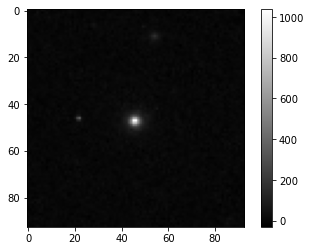

In [36]:
print("*"*20 + " original image " + "*"*20)
image1 = hdul[1].data
plt.imshow(image1, cmap='gray');
plt.colorbar();

******************** model image ********************


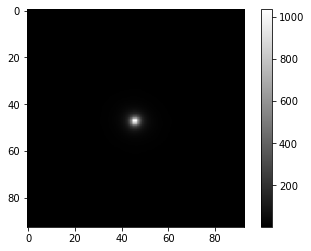

In [37]:
print("*"*20 + " model image " + "*"*20)
image2 = hdul[2].data
plt.imshow(image2, cmap='gray');
plt.colorbar();

******************** residual image ********************


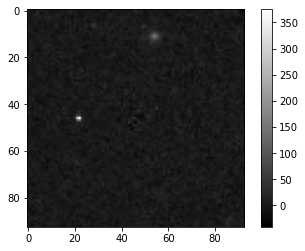

In [39]:
print("*"*20 + " residual image " + "*"*20)
image3 = hdul[3].data
plt.imshow(image3, cmap='gray');
plt.colorbar();